## Importing the required libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler


## Accessing the dataset

In [4]:
data = pd.read_csv('uncleaned_crop_yield.csv')
df = pd.DataFrame(data)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 10 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   Region                  1000000 non-null  object 
 1   Soil_Type               1000000 non-null  object 
 2   Crop                    1000000 non-null  object 
 3   Rainfall_mm             950000 non-null   float64
 4   Temperature_Celsius     950001 non-null   float64
 5   Fertilizer_Used         1000000 non-null  bool   
 6   Irrigation_Used         1000000 non-null  bool   
 7   Weather_Condition       1000000 non-null  object 
 8   Days_to_Harvest         950000 non-null   float64
 9   Yield_tons_per_hectare  950000 non-null   float64
dtypes: bool(2), float64(4), object(4)
memory usage: 62.9+ MB
None


# Data Cleaning Steps

## 1. Removing Duplicates

In [7]:
df.drop_duplicates(inplace=True)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 10 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   Region                  1000000 non-null  object 
 1   Soil_Type               1000000 non-null  object 
 2   Crop                    1000000 non-null  object 
 3   Rainfall_mm             950000 non-null   float64
 4   Temperature_Celsius     950001 non-null   float64
 5   Fertilizer_Used         1000000 non-null  bool   
 6   Irrigation_Used         1000000 non-null  bool   
 7   Weather_Condition       1000000 non-null  object 
 8   Days_to_Harvest         950000 non-null   float64
 9   Yield_tons_per_hectare  950000 non-null   float64
dtypes: bool(2), float64(4), object(4)
memory usage: 62.9+ MB
None


## 2. Replace data inplace

In [9]:
df['Rainfall_mm'] = df['Rainfall_mm'].fillna(value=df['Rainfall_mm'].mean())
df['Temperature_Celsius'] = df['Temperature_Celsius'].fillna(value=df['Temperature_Celsius'].mean())
df['Days_to_Harvest'] = df['Days_to_Harvest'].fillna(value=df['Days_to_Harvest'].mean())

df.dropna(subset='Yield_tons_per_hectare', inplace=True)
print(df.isnull().sum())

Region                    0
Soil_Type                 0
Crop                      0
Rainfall_mm               0
Temperature_Celsius       0
Fertilizer_Used           0
Irrigation_Used           0
Weather_Condition         0
Days_to_Harvest           0
Yield_tons_per_hectare    0
dtype: int64


## 3. Remove leading and trailing white spaces

In [11]:
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

## 4. Consistency in columns

In [13]:
print(df['Fertilizer_Used'].unique())
print(df['Irrigation_Used'].unique())

[False  True]
[ True False]


In [14]:
change_type = {
    False: 'F',
    True: 'T'
}
df['Fertilizer_Used'] = df['Fertilizer_Used'].replace(change_type)

df['Irrigation_Used'] = df['Irrigation_Used'].replace(change_type)

In [15]:
print(df['Fertilizer_Used'].unique())
print(df['Irrigation_Used'].unique())

['F' 'T']
['T' 'F']


## 5. Capitalize all string type data column

In [17]:
df = df.apply(lambda x: x.str.upper() if x.dtype == "object" else x)
df.head()

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
0,WEST,SANDY,COTTON,897.077239,27.676966,F,T,CLOUDY,122.000000,6.555816
1,SOUTH,CLAY,RICE,992.673282,18.026142,T,T,RAINY,140.000000,8.527341
3,NORTH,SANDY,SOYBEAN,986.866331,16.644190,F,T,RAINY,146.000000,6.517573
4,SOUTH,SILT,WHEAT,730.379174,31.620687,T,T,CLOUDY,110.000000,7.248251
5,SOUTH,SILT,SOYBEAN,797.471182,37.704974,F,T,RAINY,104.497607,5.898416


## 6. Convert Region and Crop to categorical data

In [19]:
df['Region'] = df['Region'].astype('category')
df['Crop'] = df['Crop'].astype('category')

## 7. Rounding decimal places to 2

In [21]:
df['Rainfall_mm'] = df['Rainfall_mm'].round(2)

## 8. Outliers removal

In [23]:
for col in df.select_dtypes(include=[np.number]).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 949908 entries, 0 to 999999
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype   
---  ------                  --------------   -----   
 0   Region                  949908 non-null  category
 1   Soil_Type               949908 non-null  object  
 2   Crop                    949908 non-null  category
 3   Rainfall_mm             949908 non-null  float64 
 4   Temperature_Celsius     949908 non-null  float64 
 5   Fertilizer_Used         949908 non-null  object  
 6   Irrigation_Used         949908 non-null  object  
 7   Weather_Condition       949908 non-null  object  
 8   Days_to_Harvest         949908 non-null  float64 
 9   Yield_tons_per_hectare  949908 non-null  float64 
dtypes: category(2), float64(4), object(4)
memory usage: 67.0+ MB


## 9. One-hot-encoding

In [25]:
encoded_df = pd.get_dummies(df,columns=['Region', 'Soil_Type', 'Crop', 'Weather_Condition', 'Irrigation_Used', 'Fertilizer_Used'], dtype=float)
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 949908 entries, 0 to 999999
Data columns (total 27 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Rainfall_mm               949908 non-null  float64
 1   Temperature_Celsius       949908 non-null  float64
 2   Days_to_Harvest           949908 non-null  float64
 3   Yield_tons_per_hectare    949908 non-null  float64
 4   Region_EAST               949908 non-null  float64
 5   Region_NORTH              949908 non-null  float64
 6   Region_SOUTH              949908 non-null  float64
 7   Region_WEST               949908 non-null  float64
 8   Soil_Type_CHALKY          949908 non-null  float64
 9   Soil_Type_CLAY            949908 non-null  float64
 10  Soil_Type_LOAM            949908 non-null  float64
 11  Soil_Type_PEATY           949908 non-null  float64
 12  Soil_Type_SANDY           949908 non-null  float64
 13  Soil_Type_SILT            949908 non-null  float6

## 10. Inconsistent Data: Rounding Billing Amount upto 2 decimal places


In [27]:
scaler = MinMaxScaler()
encoded_df[['Rainfall_mm', 'Temperature_Celsius']] = scaler.fit_transform(encoded_df[['Rainfall_mm', 'Temperature_Celsius']])
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 949908 entries, 0 to 999999
Data columns (total 27 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Rainfall_mm               949908 non-null  float64
 1   Temperature_Celsius       949908 non-null  float64
 2   Days_to_Harvest           949908 non-null  float64
 3   Yield_tons_per_hectare    949908 non-null  float64
 4   Region_EAST               949908 non-null  float64
 5   Region_NORTH              949908 non-null  float64
 6   Region_SOUTH              949908 non-null  float64
 7   Region_WEST               949908 non-null  float64
 8   Soil_Type_CHALKY          949908 non-null  float64
 9   Soil_Type_CLAY            949908 non-null  float64
 10  Soil_Type_LOAM            949908 non-null  float64
 11  Soil_Type_PEATY           949908 non-null  float64
 12  Soil_Type_SANDY           949908 non-null  float64
 13  Soil_Type_SILT            949908 non-null  float6

# Exploratory Data Analysis

## 1. Bar plot: Count of each crop type

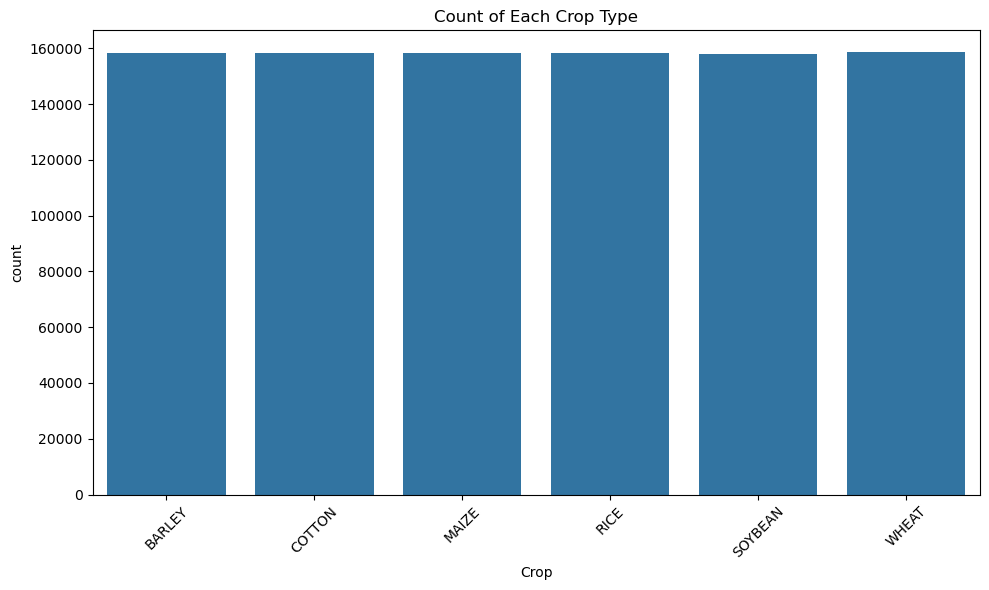

In [30]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Crop')
plt.title("Count of Each Crop Type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 2. Pie chart: Proportion of regions

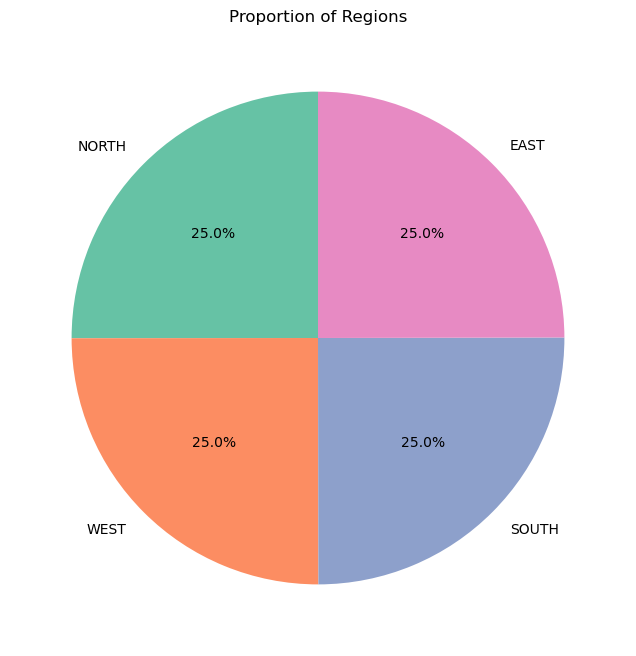

In [32]:
plt.figure(figsize=(8, 8))
df['Region'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set2"))
plt.title("Proportion of Regions")
plt.ylabel('')
plt.show()

## 3. Box plot: Distribution of rainfall across different crops

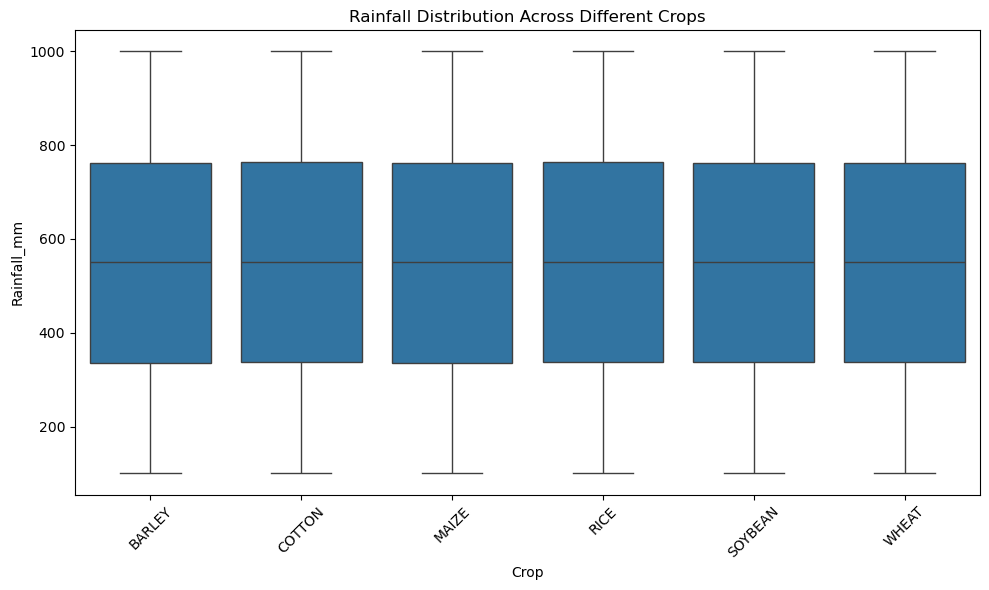

In [34]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Crop', y='Rainfall_mm')
plt.title("Rainfall Distribution Across Different Crops")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 4. Histogram: Distribution of temperature

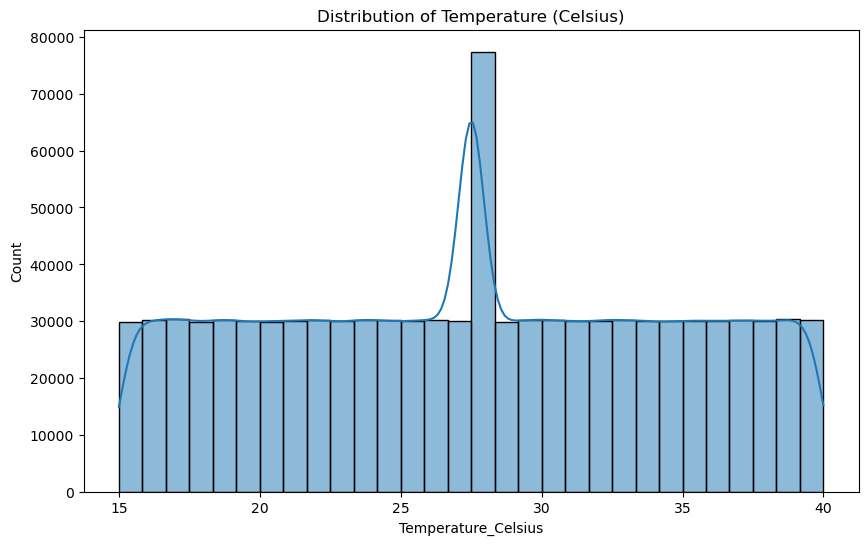

In [36]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Temperature_Celsius'], kde=True, bins=30)
plt.title("Distribution of Temperature (Celsius)")
plt.show()


## 5. Pairplot: Relationship among continuous variables

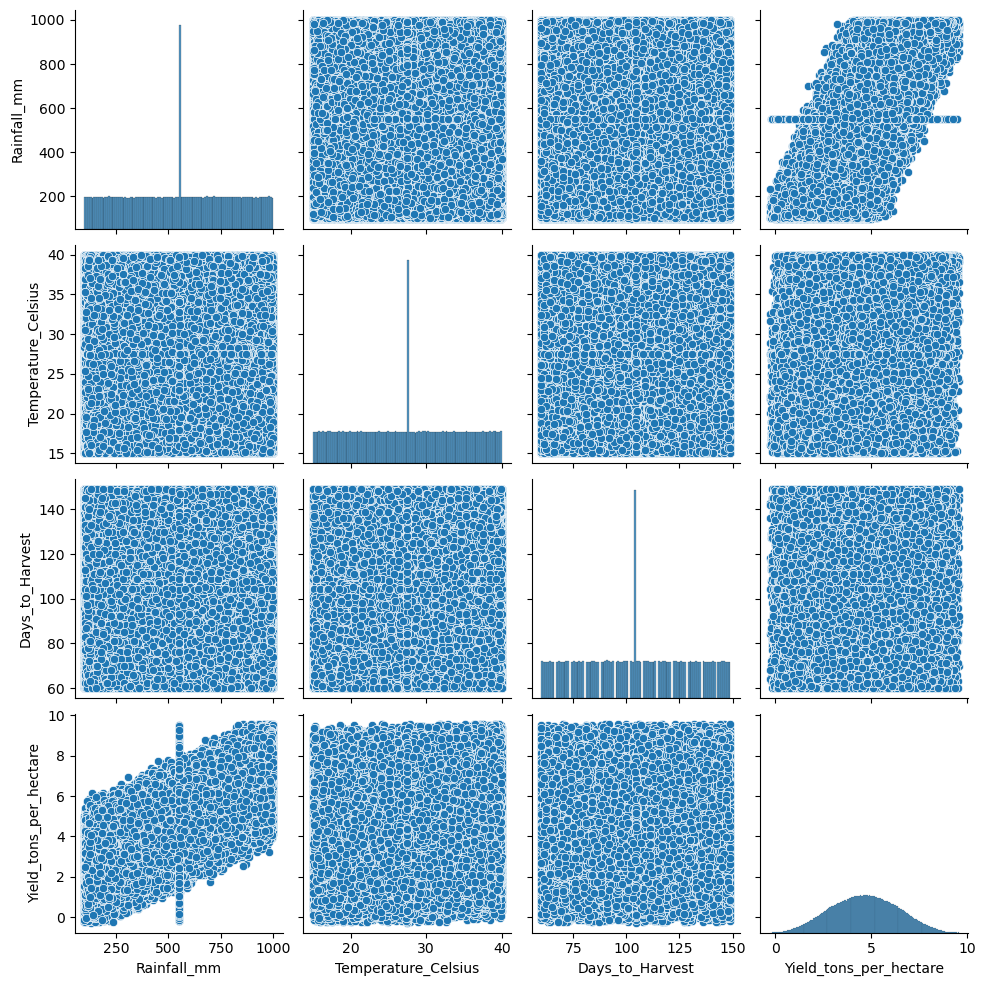

In [38]:
sns.pairplot(df[['Rainfall_mm', 'Temperature_Celsius', 'Days_to_Harvest', 'Yield_tons_per_hectare']])
plt.show()

## 6. Box plot: Yield distribution across soil types


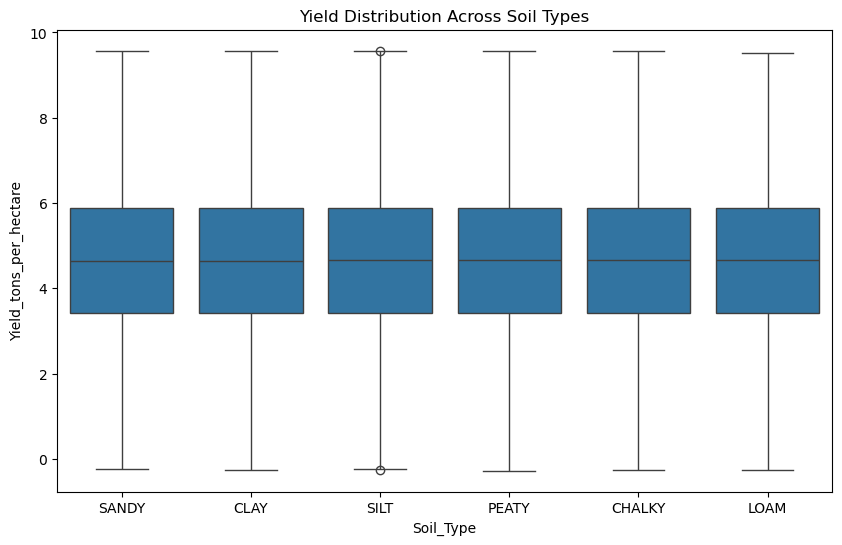

In [40]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Soil_Type', y='Yield_tons_per_hectare')
plt.title("Yield Distribution Across Soil Types")
plt.show()

## 7. Strip plot: Rainfall across different regions

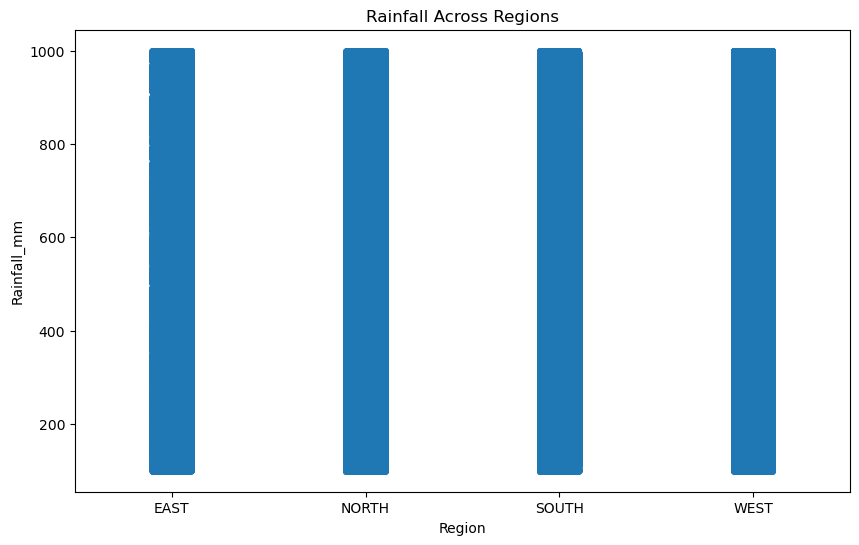

In [42]:
plt.figure(figsize=(10, 6))
sns.stripplot(data=df, x='Region', y='Rainfall_mm', jitter=True)
plt.title("Rainfall Across Regions")
plt.show()

## 8. Bar plot: Average yield by region


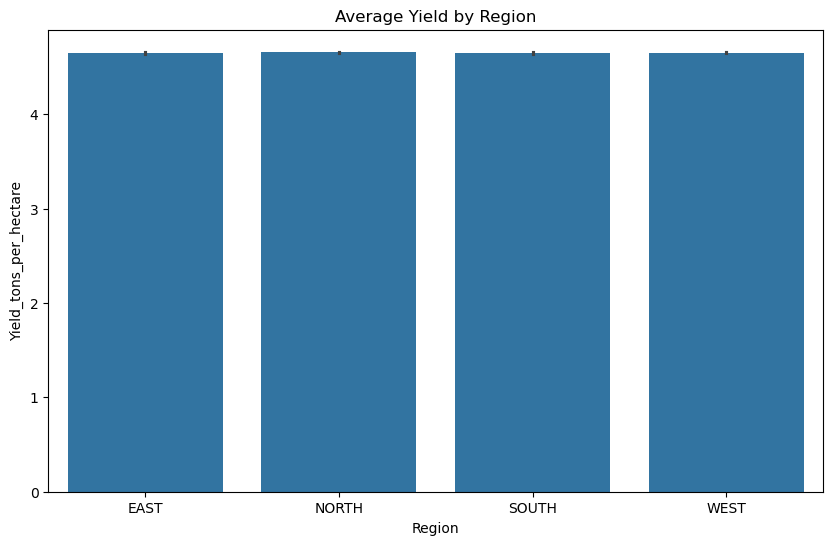

In [44]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Region', y='Yield_tons_per_hectare', estimator='mean')
plt.title("Average Yield by Region")
plt.show()

## 9. FacetGrid: Relationship between fertilizer usage and yield, separated by irrigation

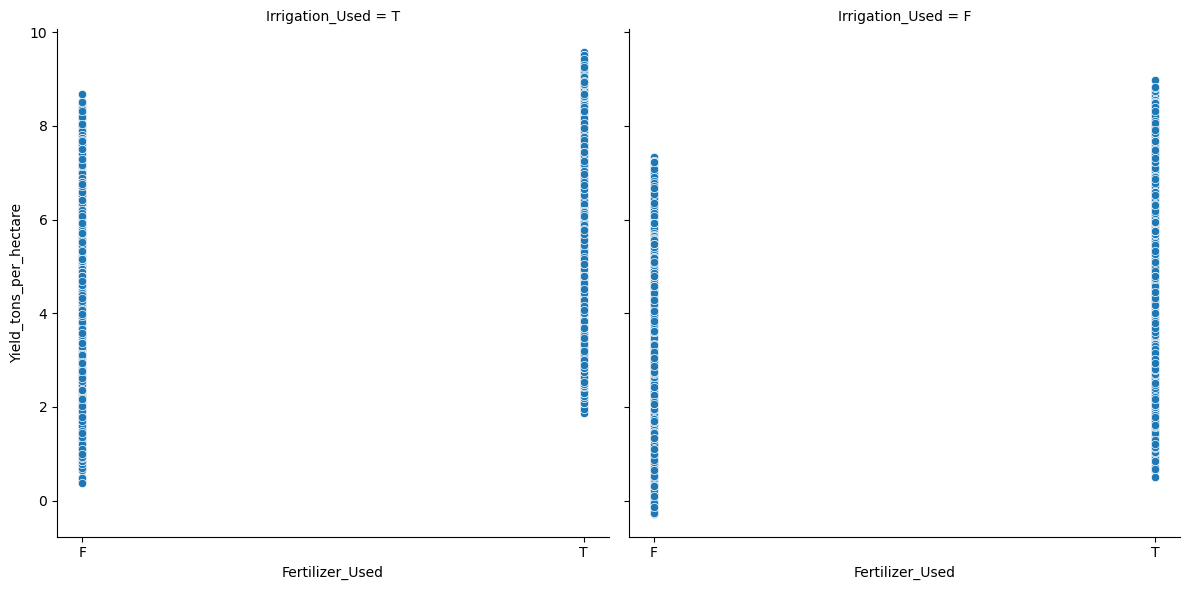

In [52]:
g = sns.FacetGrid(df, col='Irrigation_Used', height=6, aspect=1)
g.map(sns.scatterplot, 'Fertilizer_Used', 'Yield_tons_per_hectare')
plt.show()

## 10. Heatmap: Correlation matrix of continuous variable


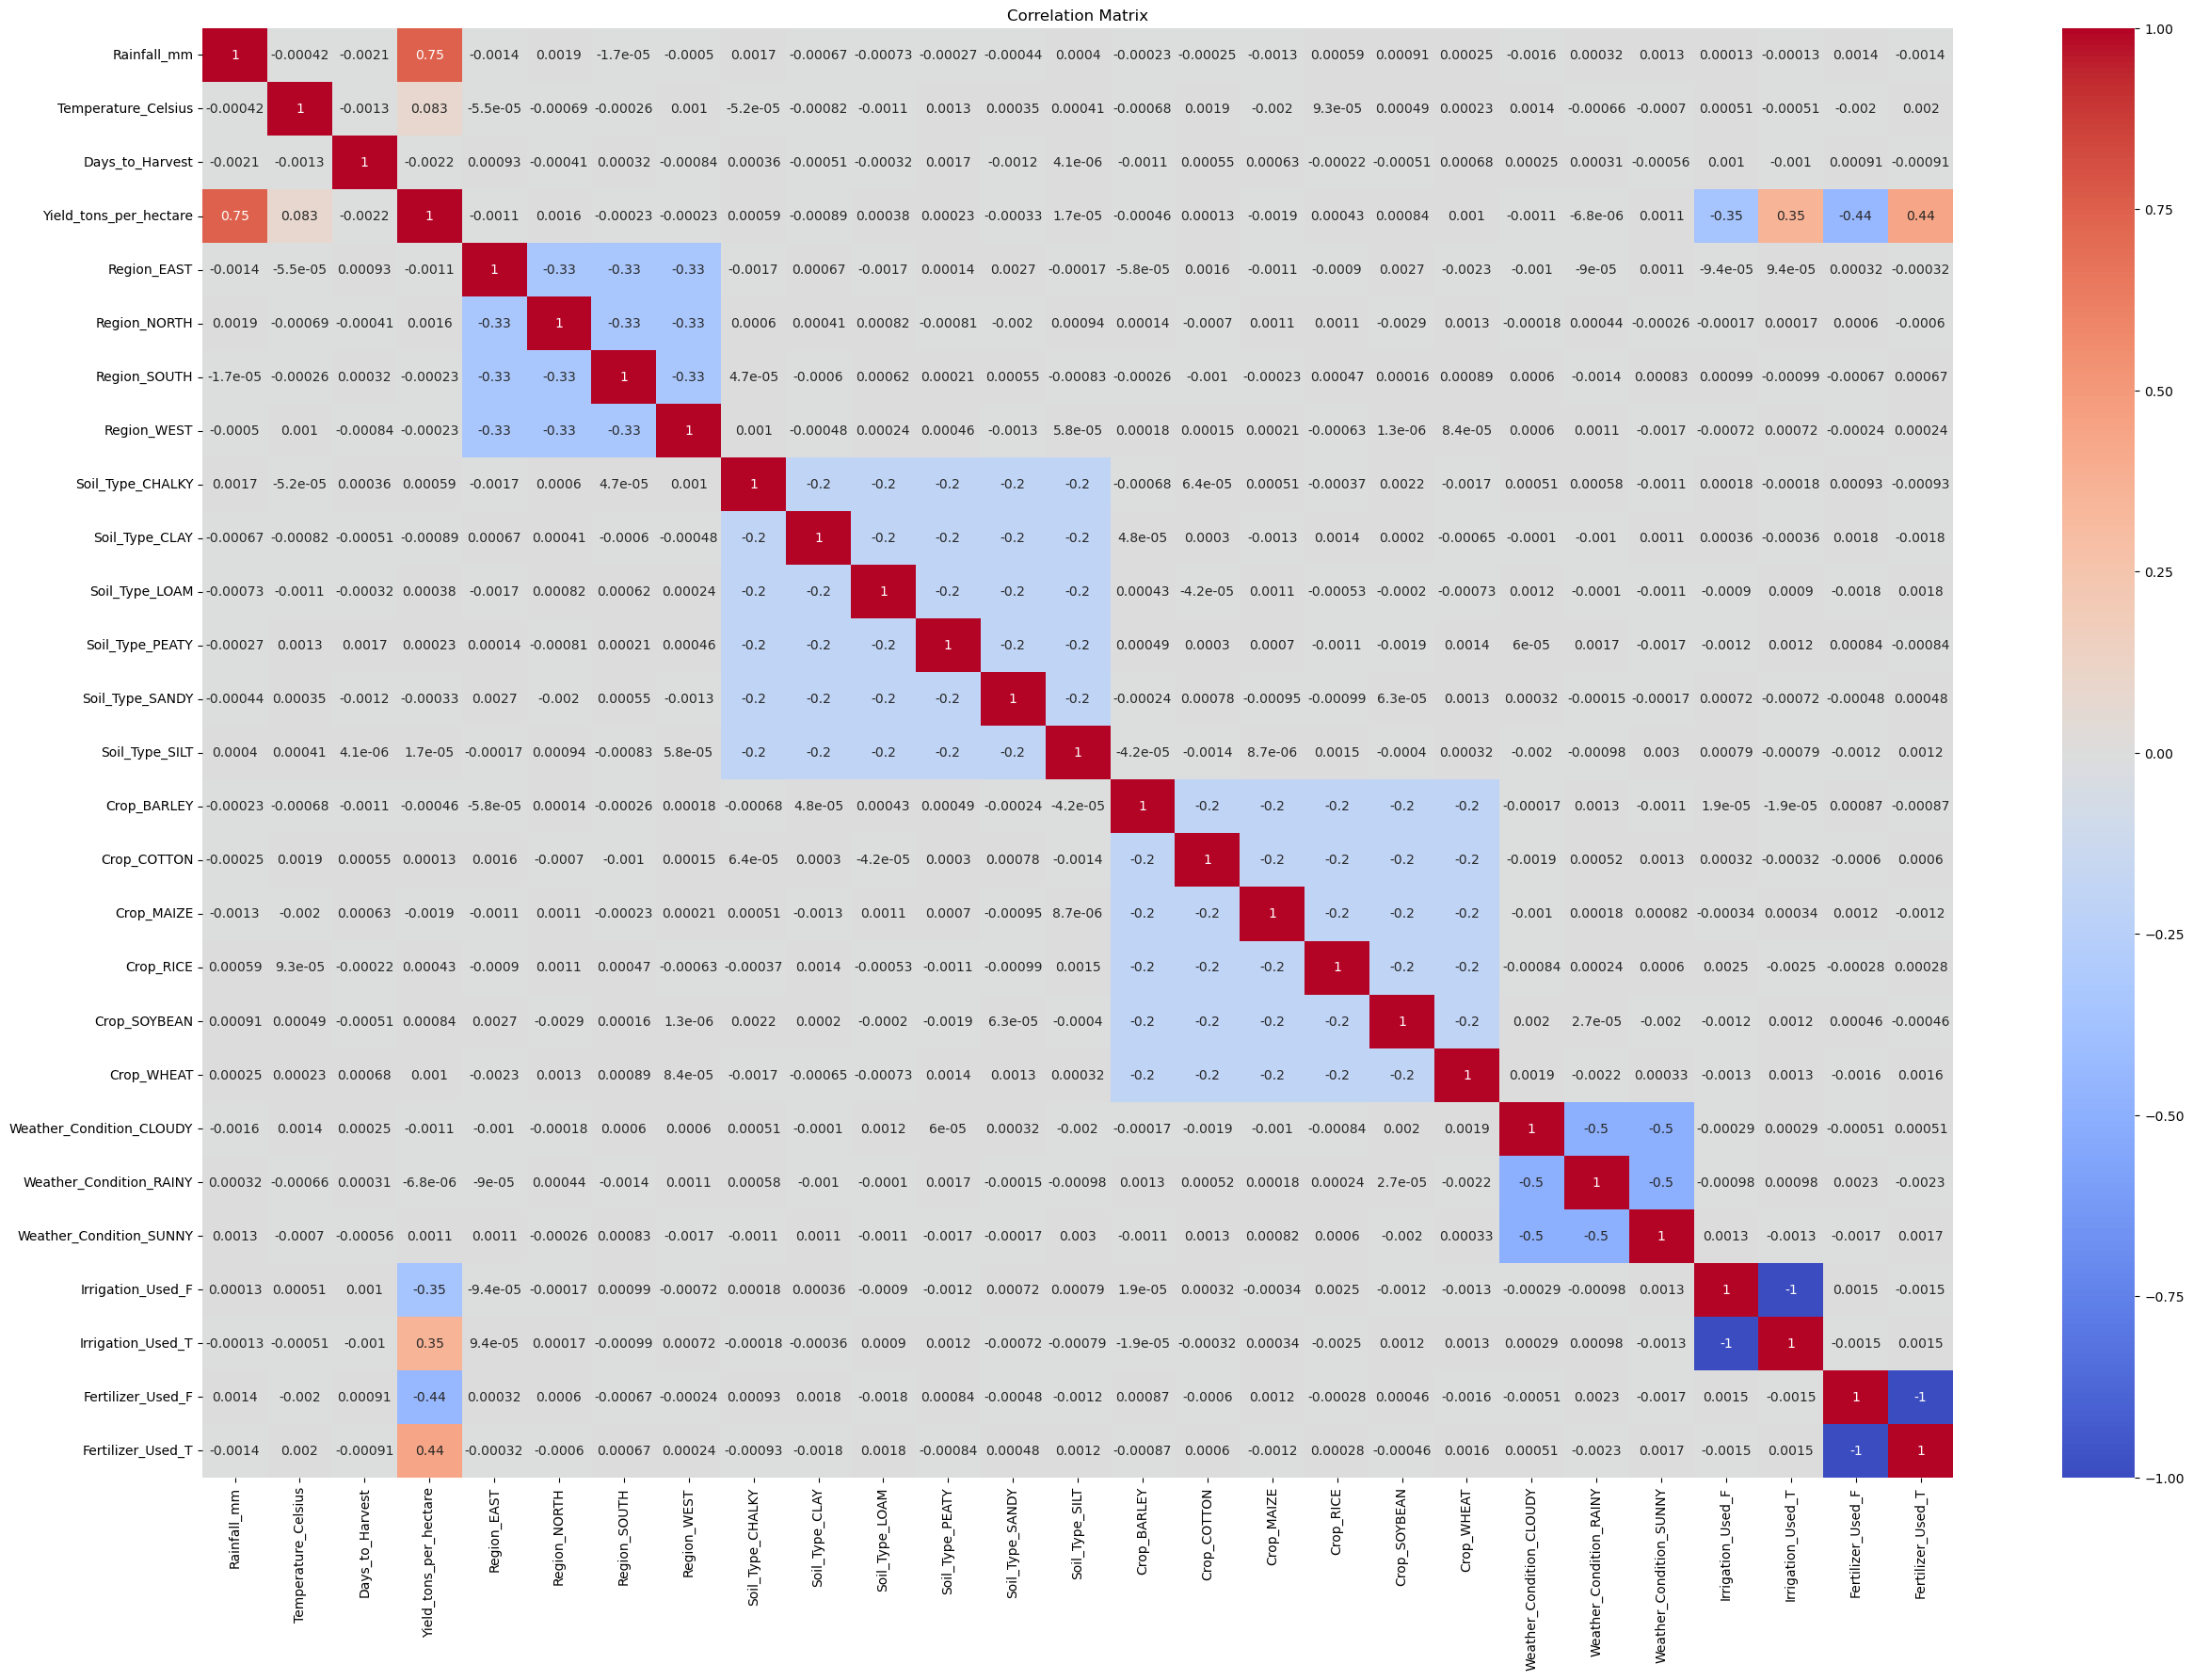

In [55]:
plt.figure(figsize=(30, 20))
sns.heatmap(encoded_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()